In [1]:
import numpy as np
import pandas as pd

In [2]:
def softmax(x):
    x = x.transpose()
    maxima = np.amax(x,axis=0)
    x = x-maxima
    numerator = np.exp(x)
    return (numerator/numerator.sum(axis=0)).transpose()

In [3]:
def createOneHotVectors(x):
    mat = np.zeros((x.shape[0],np.max(np.array(x))+1))
    mat[np.arange(x.shape[0]),x.flatten()] = 1
    return mat

In [4]:
def normalizeData(data):
    data = data/255
    return data

In [5]:
Train_data = normalizeData(np.array(pd.read_csv('mnist/mnist-train-data.csv',sep = " ",header = None)))
Train_labels = createOneHotVectors(np.array(pd.read_csv('mnist/mnist-train-labels.csv',sep = " ",header = None)))
Test_data = normalizeData(np.array(pd.read_csv('mnist/mnist-test-data.csv',sep = " ",header = None)))
Test_labels = createOneHotVectors(np.array(pd.read_csv('mnist/mnist-test-labels.csv',sep = " ",header = None)))
CV_data = normalizeData(np.array(pd.read_csv('mnist/mnist-valid-data.csv',sep = " ",header = None)))
CV_labels = createOneHotVectors(np.array(pd.read_csv('mnist/mnist-valid-labels.csv',sep = " ",header = None)))

In [6]:
def crossEntropyLoss(Hypothesis,y):
    return - np.sum(np.multiply(np.log(Hypothesis+1e-10) , (y)), axis=1)

In [7]:
def forward_pass(X,w,b):
    return X@w+b

In [8]:
def Backward_pass(X_,hypo,y_,w,b,l):
    gradient_at_softmax_input = find_gradient(hypo,y_)
    d_weights = X_.transpose()@gradient_at_softmax_input
    d_bias = np.mean(gradient_at_softmax_input,axis=0)
    w = w - l* d_weights
    b = b - l* d_bias
    return w,b

In [9]:
def find_gradient(Hypothesis,y):
    return (1/y.shape[0]) * (Hypothesis-y)


In [10]:
def fit(X,y,Batch_size,Learning_rate,epochs):
   
    bias = np.zeros((1,Train_labels.shape[1]))
    variance = np.sqrt(2/(X.shape[1]+y.shape[1]))
    initial_weights = np.random.normal(0,variance,X.shape[1]*y.shape[1])
    weights = initial_weights.reshape(X.shape[1],y.shape[1])
    loss = np.zeros(epochs)
    for i in range(epochs):
        if(i%50 == 0):
            Learning_rate/= 10
        Loss = np.empty(Batch_size)
        for j in range(0,X.shape[0],Batch_size):
            output_layer = forward_pass(X[j:j+Batch_size,:],weights,bias)
            output_activations = softmax(output_layer)
            weights, bias = Backward_pass(X[j:j+Batch_size,:],output_activations,y[j:j+Batch_size,:],weights,bias,Learning_rate)
        np.append(Cost,np.mean(Loss))
    return weights,bias,Cost

In [11]:
weights,bias,Cost = fit(Train_data,Train_labels,50,1,200)

In [12]:
1-(np.count_nonzero(np.argmax(Test_labels,axis=1).reshape(1,10000)  != np.argmax(softmax(np.matmul(Test_data,weights)+bias),axis=1).flatten())/10000)


0.9255

In [13]:
print(np.count_nonzero(np.argmax(Test_labels,axis=1).reshape(1,10000)  != np.argmax(softmax(np.matmul(Test_data,weights)+bias),axis=1).flatten()))
Hard_Examples = (np.argmax(Test_labels,axis=1).reshape(1,10000)  != np.argmax(softmax(np.matmul(Test_data,weights)+bias),axis=1).flatten())

745


In [14]:
1-(np.count_nonzero(np.argmax(Train_labels,axis=1).reshape(1,50000)  != np.argmax(softmax(np.matmul(Train_data,weights)+bias),axis=1).flatten())/50000)

0.9321

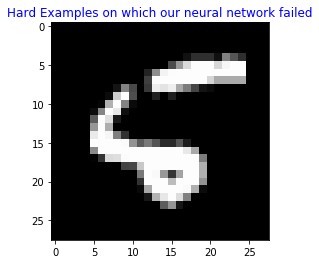

In [16]:
import matplotlib.pyplot as plt
Test_data_hard = Test_data[Hard_Examples.flatten(),:]
Test_data_hard= Test_data_hard.reshape(-1,28,28)
plt.imshow(Test_data_hard[0],cmap='gray')
plt.title('Hard Examples on which our neural network failed',color = 'b')
plt.show()